In [66]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Будем оптимизировать функцию

$$
f(x,y)=\sin(y)e^{(1-\cos(x))^2}+\cos(x)e^{(1-\sin(y))^2}+(x-y)^2
$$
$$
0\leq x\leq11
$$
$$
0\leq y\leq11
$$

In [67]:
def f(p):
    x = p.T[0]
    y = p.T[1]
    return np.sin(y) * np.exp((1 - np.cos(x)) ** 2) + \
           np.cos(x) * np.exp((1 - np.sin(y)) ** 2) + \
           (x - y) ** 2

Реализуем алгоритм [Нелдера-Мида](http://www.scholarpedia.org/article/Nelder-Mead_algorithm).

In [73]:
class NelderMeadAlgo:
    def __init__(self, f, x0,
                 step=1.0, alpha=1.0,
                 beta=0.5, gamma=2.0, delta=0.5):
        self.n = len(x0)
        self.step = step
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.delta = delta
        self.f = f
        S = np.vstack([np.zeros(self.n), np.eye(self.n)])
        self.x = x0 + S * self.step
        self.f_val = self.f(self.x)
    
    def run(self, max_steps=10**3, x_th=1e-6, f_th=1e-6):
        xs = [self.x[0].copy()]
        f_vals = [self.f_val[0]]
        for i in range(max_steps):
            self.make_step()
            idx = np.argmin(self.f_val)
            xs.append(self.x[idx].copy())
            f_vals.append(self.f_val[idx])
            if ((self.x[:, np.newaxis] - self.x) ** 2).mean() < x_th:
                break
            if ((self.f_val[:, np.newaxis] - self.f_val) ** 2).mean() < f_th:
                break
        return np.array(xs), np.array(f_vals)
    
    def make_step(self):
        h, s, l = self.f_val.argsort()[[-1, -2, 0]]
        xh, xs, xl = self.x[[h, s, l]]
        fh, fs, fl = self.f_val[[h, s, l]]
        c = (self.x.sum(axis=0) - xh) / self.n
        xr = c + self.alpha * (c - xh)
        fr = self.f(xr)
        if fl <= fr < fs:
            self.x[h] = xr
            self.f_val[h] = fr
            return
        if fr < fl:
            xe = c + self.gamma * (xr - c)
            fe = self.f(xe)
            if fe < fr:
                self.x[h] = xe
                self.f_val[h] = fe
                return
        if fr >= fs:
            if fr < fh:
                xc = c + self.beta * (xr - c)
                fc = self.f(xc)
                if fc <= fr:
                    self.x[h] = xc
                    self.f_val[h] = fc
                    return
            else:
                xc = c + self.beta * (xh - c)
                fc = self.f(xc)
                if fc < fh:
                    self.x[h] = xc
                    self.f_val[h] = fc
                    return
        self.x = xl + self.delta * (self.x - xl)
        self.f_val = self.f(self.x)

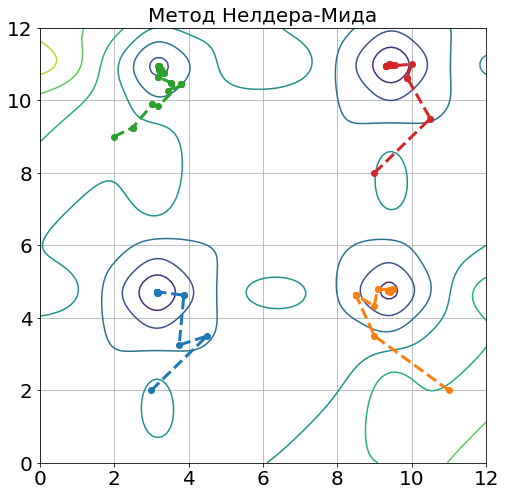

In [77]:
u = np.linspace(0, 12, 100)
x, y = np.meshgrid(u, u)
X = np.vstack([x.flatten(), y.flatten()]).T
f_x = f(X).reshape(len(x), -1)

plt.figure(figsize=(8, 8))
plt.grid(':')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.contour(x, y, f_x)

p0 = [[3, 2], [11, 2], [2, 9], [9, 8]]
for p in p0:
    x, fval = NelderMeadAlgo(f, np.array(p)).run()
    plt.plot(x.T[0], x.T[1], ls='--', marker='o', lw=3)
plt.title('Метод Нелдера-Мида', fontsize=20)
plt.show()

Получилось, что для разных начальных точек алгоритм Нелдера-Мида сходится к разным точкам.

По умолчанию гиперпараметры равны $\alpha=1,  \beta = \frac12, \gamma = 2$.

Возьмём другие значения, например, $\alpha=2,  \beta = \frac13, \gamma = 3$. Посмотрим, как будет сходиться метод.

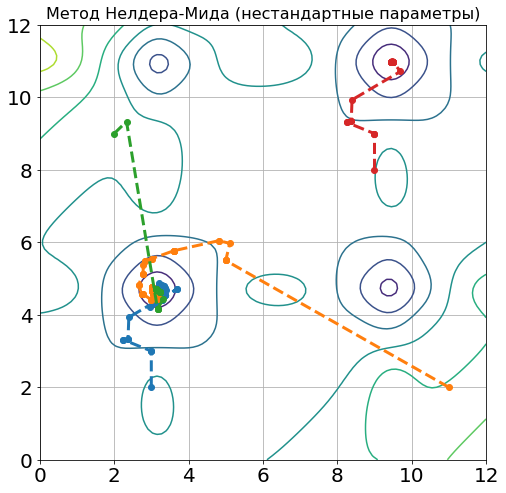

In [85]:
u = np.linspace(0, 12, 100)
x, y = np.meshgrid(u, u)
X = np.vstack([x.flatten(), y.flatten()]).T
f_x = f(X).reshape(len(x), -1)

plt.figure(figsize=(8, 8))
plt.grid(':')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.contour(x, y, f_x)

p0 = [[3, 2], [11, 2], [2, 9], [9, 8]]
for p in p0:
    x, fval = NelderMeadAlgo(f, np.array(p), alpha=2, beta=1/3, gamma=3).run()
    plt.plot(x.T[0], x.T[1], ls='--', marker='o', lw=3)
plt.title('Метод Нелдера-Мида (нестандартные параметры)', fontsize=16)
plt.show()

Получили, что для тех же начальных точек метод сошёлся к другим точкам.